# Plotting stuff for my research report, CSE527

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

## Generating delta OGT vs 16S quality plot

In [232]:
sns.set_context('talk')

In [233]:
df_ogt = pd.read_csv('../data/taxa/labels.csv', index_col=0)

In [234]:
df_ogt.describe()

,ogt
count,4424.000000
mean,31.113743
std,8.568326
min,6.000000
25%,28.000000
50%,30.000000
75%,33.500000
max,105.000000


In [235]:
df_16s = pd.read_csv('../data/taxa_pairs/pairwise_16s_blast.csv', index_col=None).sample(1500)

In [236]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000
mean,8426.784000,8067.117333,8.095357e-13,0.664807,0.599838,0.824766,0.790546
std,4851.685224,4638.211073,3.130120e-11,0.213921,0.248252,0.057631,0.231558
min,24.000000,5.000000,0.000000e+00,0.030109,0.032520,0.716707,0.032520
25%,4040.000000,4040.000000,0.000000e+00,0.629290,0.416996,0.789659,0.628513
50%,8529.000000,8172.000000,0.000000e+00,0.755485,0.683037,0.812480,0.849076
75%,12555.000000,12040.500000,1.748965e-90,0.800615,0.795081,0.836890,0.995344
max,16626.000000,16345.000000,1.212290e-09,0.983871,0.959764,1.000000,0.999362


In [237]:
meso_OGT = df_ogt.loc[df_16s['meso_index']]['ogt']

In [238]:
thermo_OGT = df_ogt.loc[df_16s['thermo_index']]['ogt']

In [239]:
assert len(meso_OGT) == len(thermo_OGT)

In [240]:
delta_OGT = thermo_OGT.values - meso_OGT.values
log_delta_OGT = np.log(delta_OGT)

In [241]:
df_16s['delta_OGT'] = delta_OGT
df_16s['log_delta_OGT'] = log_delta_OGT

In [242]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_delta_OGT
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8426.784000,8067.117333,8.095357e-13,0.664807,0.599838,0.824766,0.790546,25.661333,3.125770
std,4851.685224,4638.211073,3.130120e-11,0.213921,0.248252,0.057631,0.231558,11.662181,0.526575
min,24.000000,5.000000,0.000000e+00,0.030109,0.032520,0.716707,0.032520,1.000000,0.000000
25%,4040.000000,4040.000000,0.000000e+00,0.629290,0.416996,0.789659,0.628513,17.000000,2.833213
50%,8529.000000,8172.000000,0.000000e+00,0.755485,0.683037,0.812480,0.849076,24.500000,3.198673
75%,12555.000000,12040.500000,1.748965e-90,0.800615,0.795081,0.836890,0.995344,33.000000,3.496508
max,16626.000000,16345.000000,1.212290e-09,0.983871,0.959764,1.000000,0.999362,68.000000,4.219508


In [243]:
log_E_value= np.log(df_16s["local_E_value"])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [244]:
df_16s['log_E_value'] = log_E_value

In [245]:
df_16s.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_delta_OGT,log_E_value
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8426.784000,8067.117333,8.095357e-13,0.664807,0.599838,0.824766,0.790546,25.661333,3.125770,-inf
std,4851.685224,4638.211073,3.130120e-11,0.213921,0.248252,0.057631,0.231558,11.662181,0.526575,NaN
min,24.000000,5.000000,0.000000e+00,0.030109,0.032520,0.716707,0.032520,1.000000,0.000000,-inf
25%,4040.000000,4040.000000,0.000000e+00,0.629290,0.416996,0.789659,0.628513,17.000000,2.833213,NaN
50%,8529.000000,8172.000000,0.000000e+00,0.755485,0.683037,0.812480,0.849076,24.500000,3.198673,NaN
75%,12555.000000,12040.500000,1.748965e-90,0.800615,0.795081,0.836890,0.995344,33.000000,3.496508,-207.995694
max,16626.000000,16345.000000,1.212290e-09,0.983871,0.959764,1.000000,0.999362,68.000000,4.219508,-20.530755


<AxesSubplot:xlabel='Local E value', ylabel='$ \\Delta OGT $'>

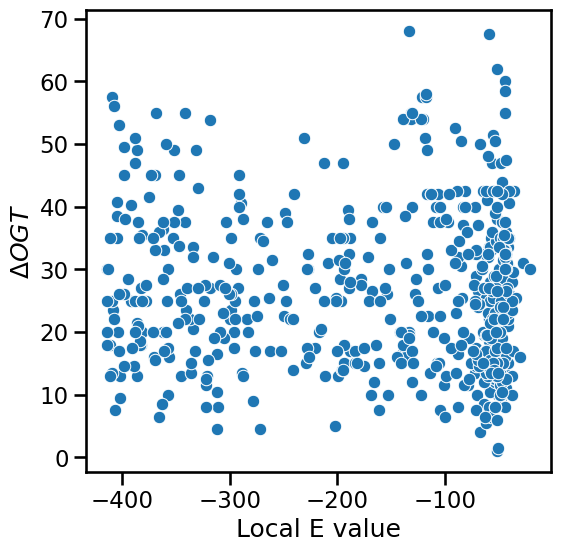

In [246]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('Local E value')
ax.set_ylabel('$ \Delta OGT $')
sns.scatterplot(x='log_E_value', y='delta_OGT', data=df_16s)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


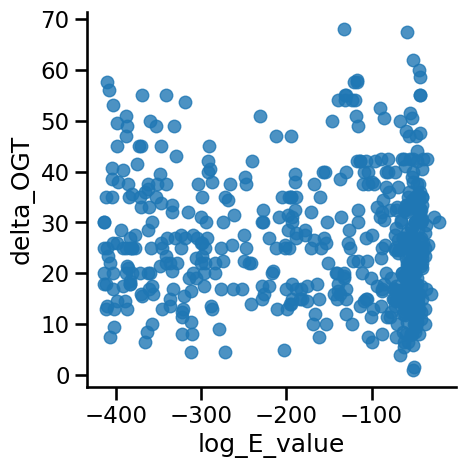

In [247]:
sns.lmplot(x='log_E_value', y='delta_OGT', data=df_16s)

### Plot generated below

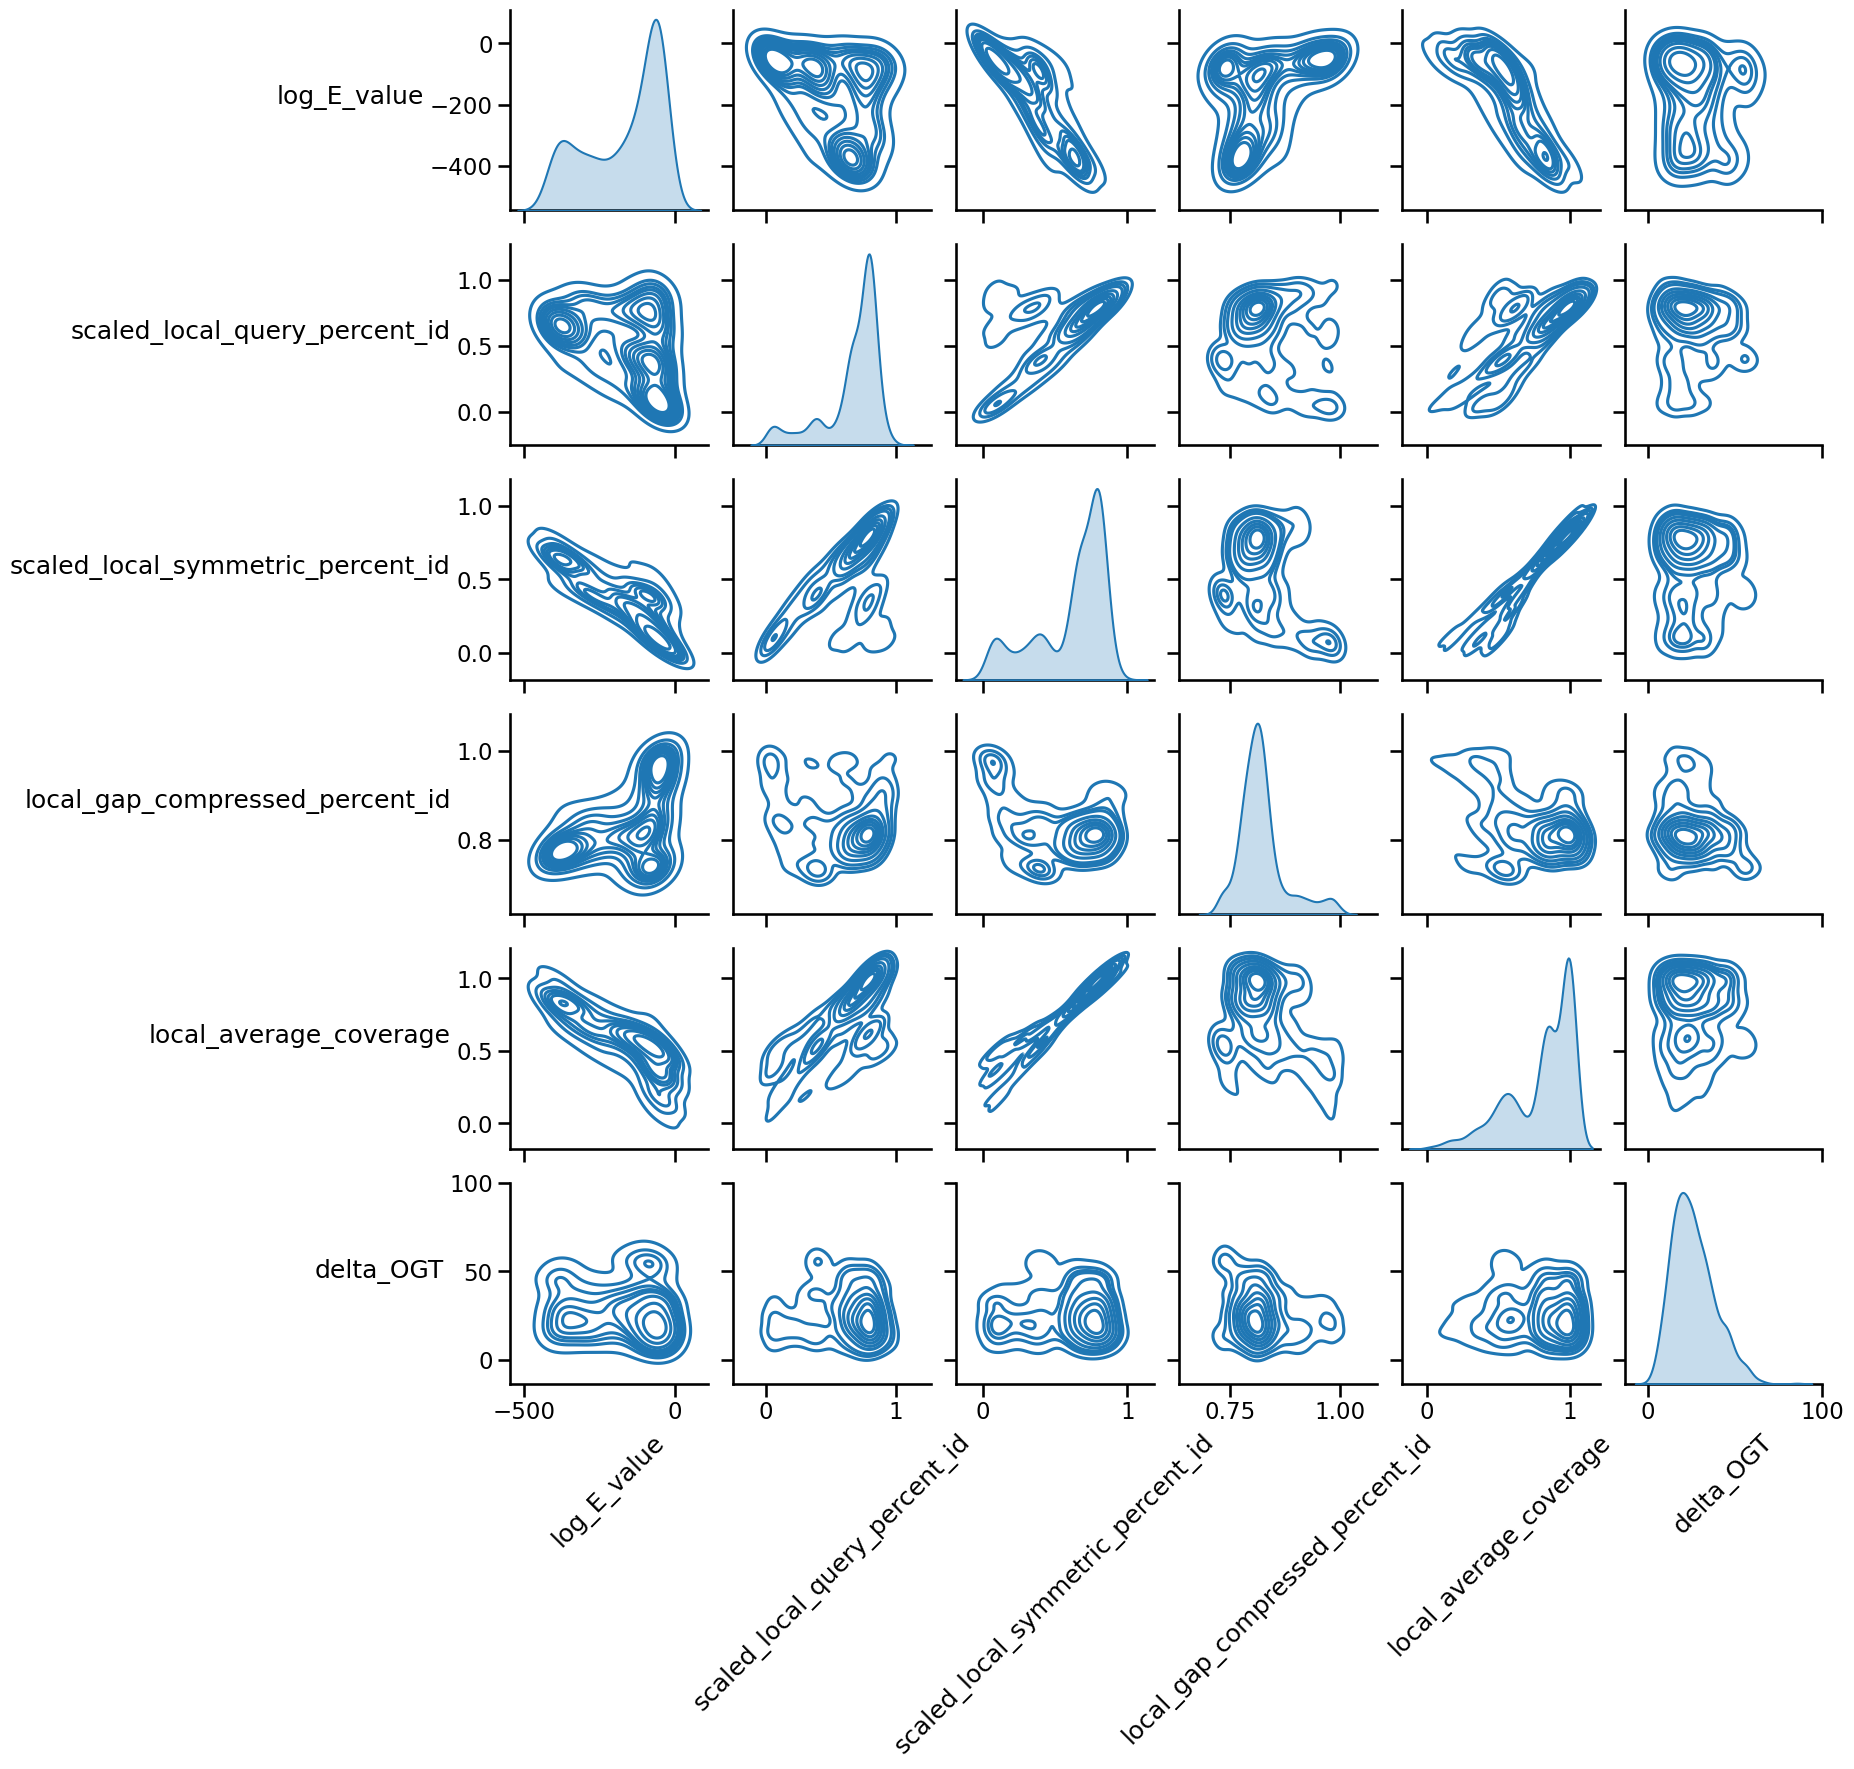

In [134]:
g = sns.pairplot(df_16s, vars = ['log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage', 'delta_OGT'], kind="kde")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

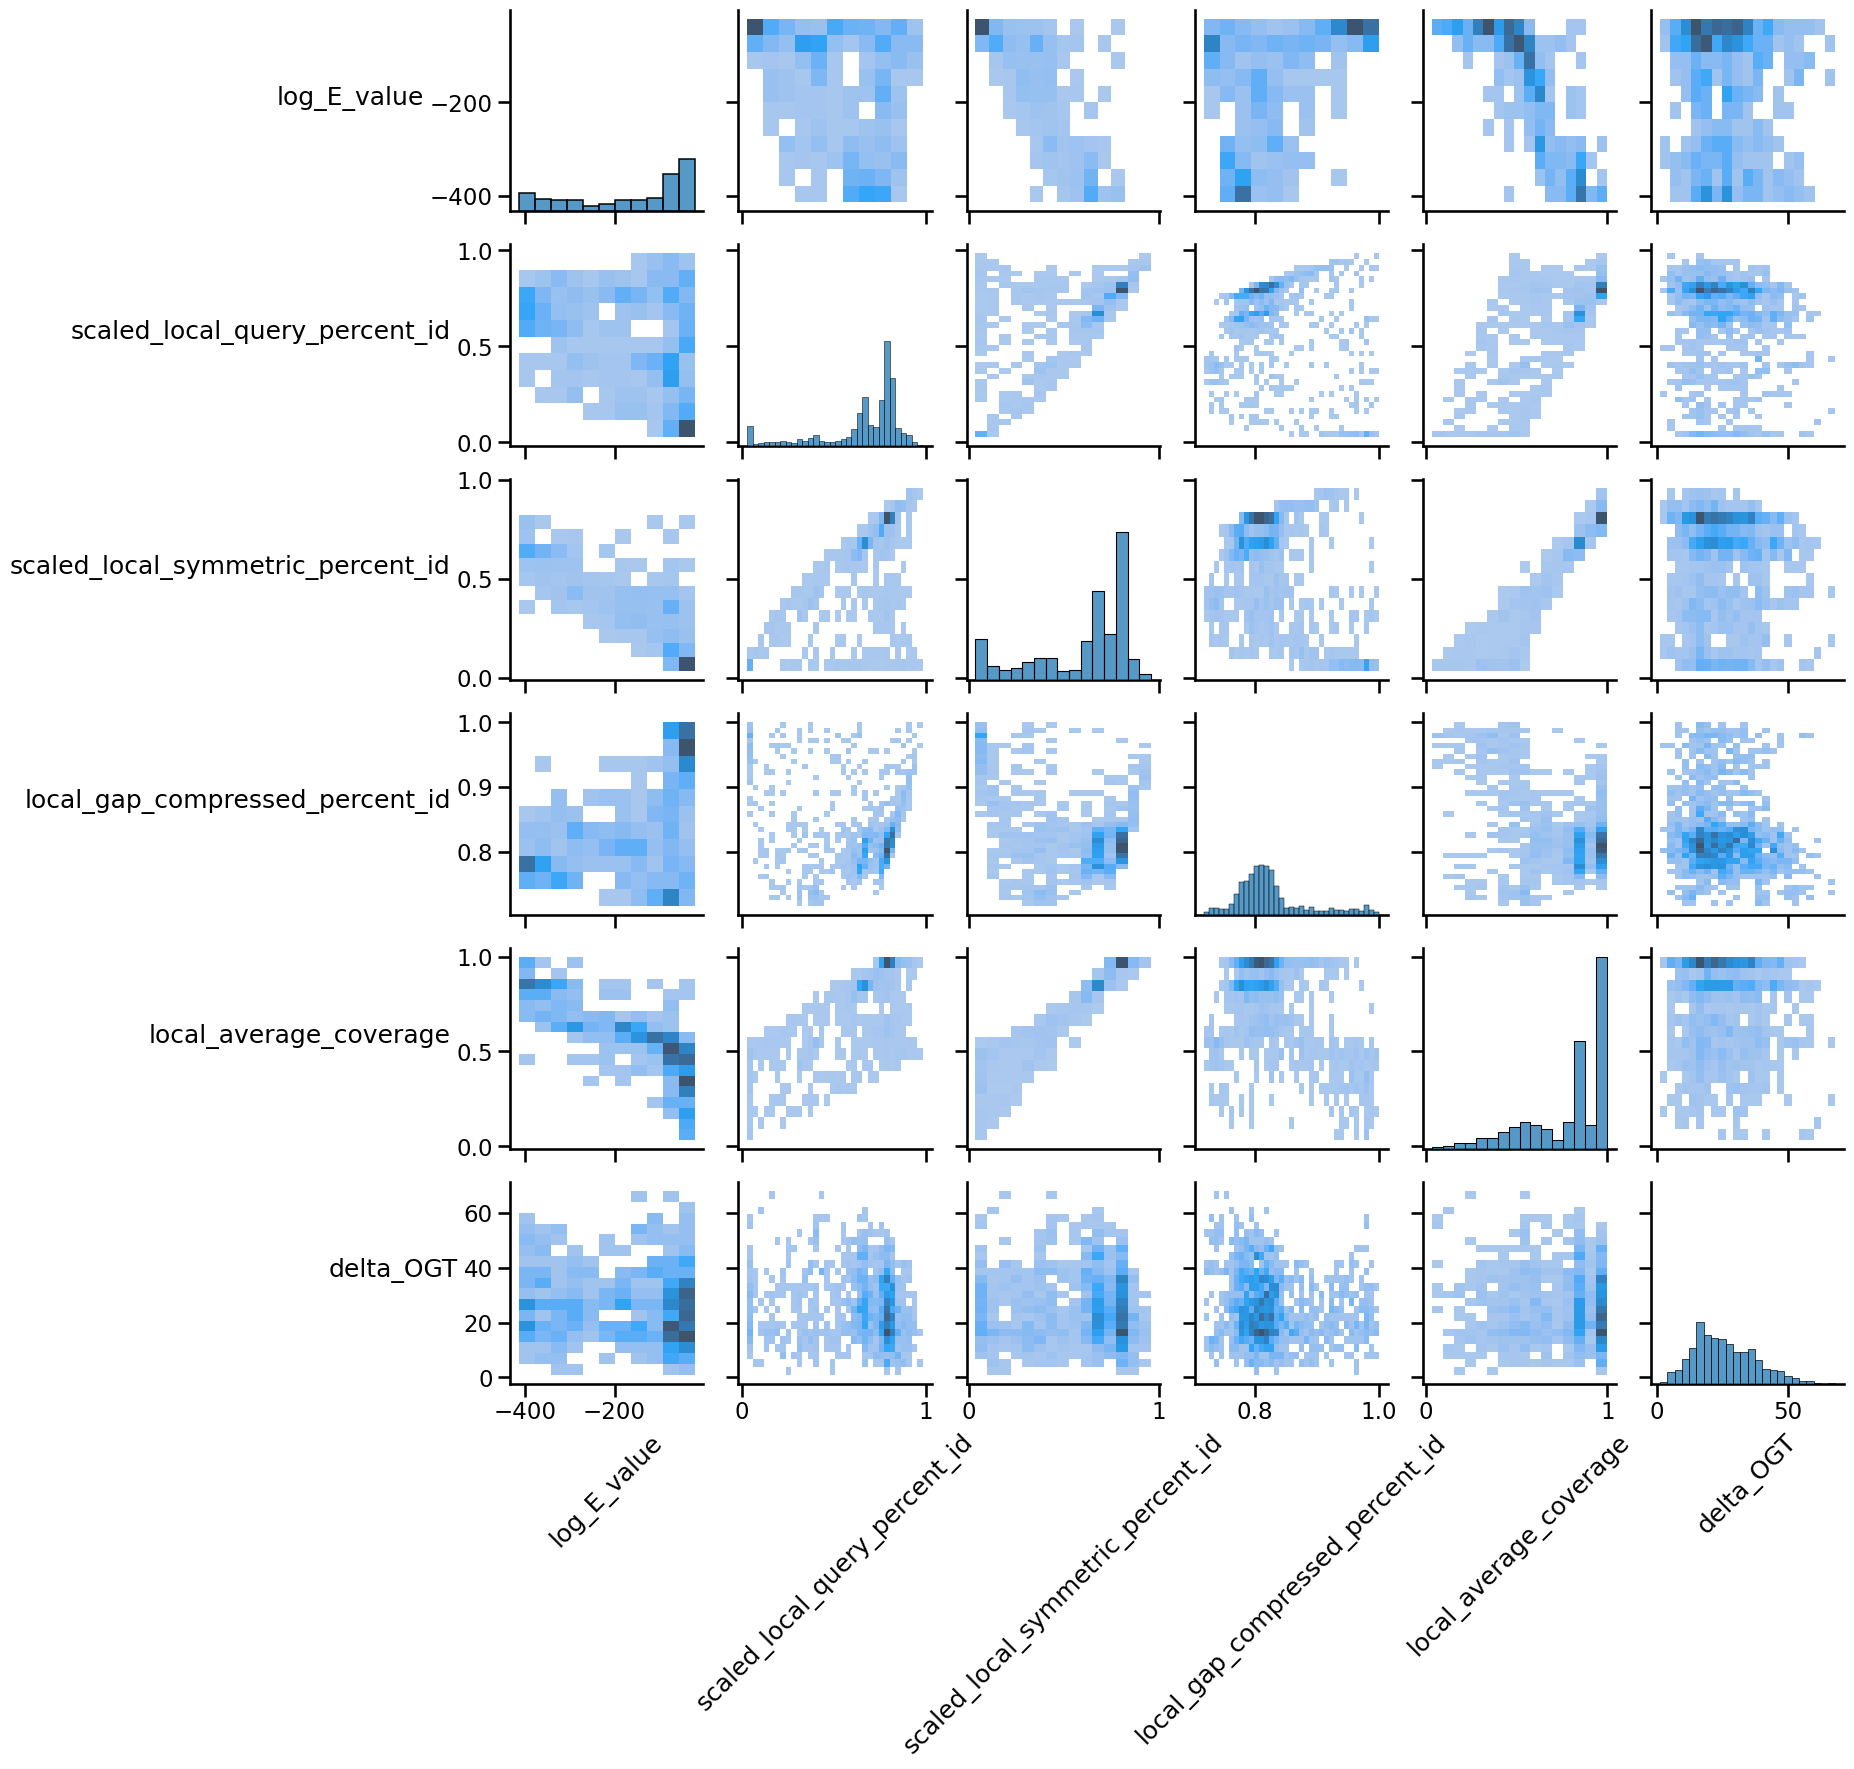

In [248]:
g = sns.pairplot(df_16s, vars = ['log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage', 'delta_OGT'], kind="hist")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

In [135]:
# g.axes.shape
g.axes[1,2].get_xlabel()

'scaled_local_symmetric_percent_id'

<AxesSubplot:>

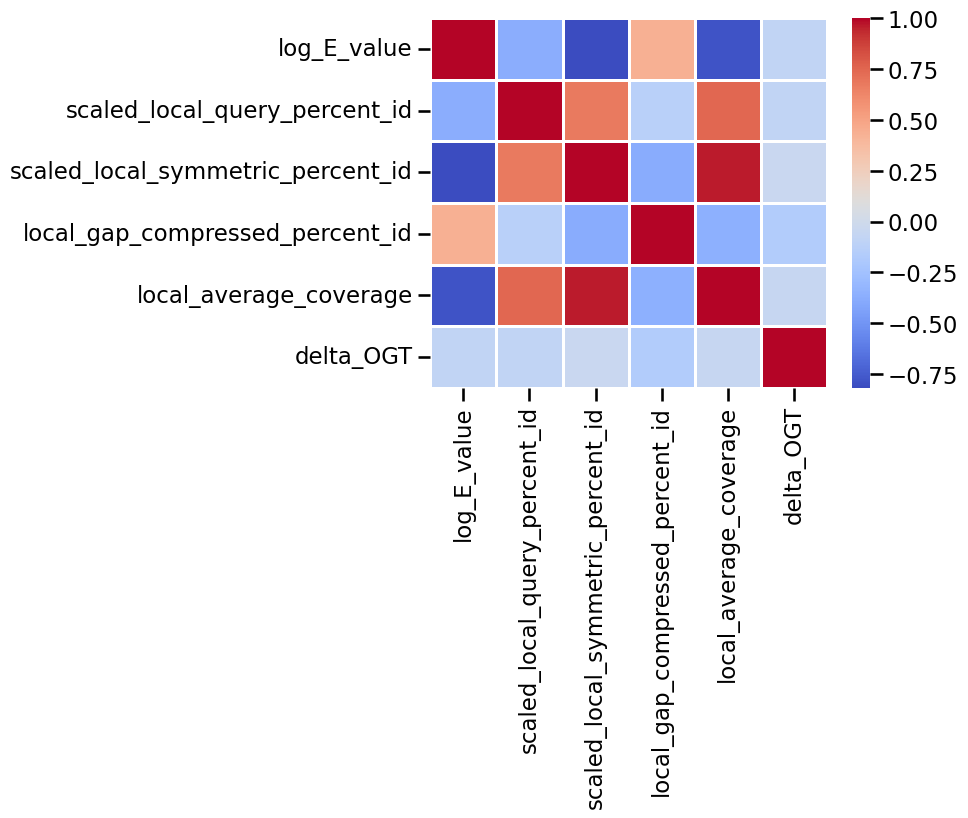

In [136]:
cormat=df_16s[['log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage','delta_OGT']].corr()
sns.heatmap(cormat, linewidth=0.75, fmt=".1f", cmap='coolwarm')

The above suggests that the 16S alignment quality is weakly correlated with $ \Delta OGT $ which suggests that the 16S rRNA sequence that defines an organism (taxa) doesn't give us a lot of information apropos if the organism is a mesophile or a thermophile.

## Aiming to generate deltaOGT vs protein alignment quality

In [137]:
# This is my path
path = "../data/taxa_pairs/protein_alignment/"

# to store files in a list
list = []

# dirs=directories
for (root, dirs, file) in os.walk(path):
	for f in file:
		if 'taxa_pair' in f:
			list.append(f)

In [138]:
list

['taxa_pair_14963-4886.csv',
 'taxa_pair_10050-2498.csv',
 'taxa_pair_8919-6836.csv',
 'taxa_pair_7134-7388.csv',
 'taxa_pair_14963-6049.csv',
 'taxa_pair_15190-14746.csv',
 'taxa_pair_7134-8905.csv',
 'taxa_pair_1462-9035.csv',
 'taxa_pair_5381-6187.csv',
 'taxa_pair_7134-15628.csv',
 'taxa_pair_4107-10206.csv',
 'taxa_pair_5381-11261.csv',
 'taxa_pair_10952-1792.csv',
 'taxa_pair_16361-16620.csv',
 'taxa_pair_15966-10926.csv',
 'taxa_pair_1462-2612.csv',
 'taxa_pair_14963-7343.csv',
 'taxa_pair_12872-12178.csv',
 'taxa_pair_1674-10646.csv',
 'taxa_pair_7470-2132.csv',
 'taxa_pair_7134-11328.csv',
 'taxa_pair_37-1613.csv',
 'taxa_pair_10686-10819.csv',
 'taxa_pair_875-5923.csv',
 'taxa_pair_7134-250.csv',
 'taxa_pair_11324-8568.csv',
 'taxa_pair_3606-647.csv',
 'taxa_pair_1724-3735.csv',
 'taxa_pair_5381-15991.csv',
 'taxa_pair_10686-753.csv',
 'taxa_pair_15190-2297.csv',
 'taxa_pair_6626-9613.csv',
 'taxa_pair_10952-14640.csv',
 'taxa_pair_9827-15634.csv',
 'taxa_pair_14963-13002.csv

In [139]:
Listofdf = []
for i in list[0:100]:
    df_ProtPair = pd.read_csv('../data/taxa_pairs/protein_alignment/'+i, index_col=0)
    Listofdf.append(df_ProtPair)

In [140]:
df_AllProPair = pd.concat(Listofdf)

In [141]:
df_AllProPair.describe()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id
count,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06
mean,9.669166e+03,8.209164e+03,5.516712e-01,2.715572e-01,2.661367e-01,3.446589e-01
std,4.798702e+03,4.604288e+03,4.644963e+00,1.091369e-01,1.108896e-01,9.172283e-02
min,3.710000e+01,2.501000e+02,1.730000e-279,7.734807e-02,3.821656e-02,1.522843e-01
25%,5.730297e+03,4.359256e+03,1.230000e-27,2.023810e-01,2.000000e-01,2.920792e-01
50%,9.827350e+03,8.160348e+03,1.540000e-16,2.470588e-01,2.425373e-01,3.227513e-01
75%,1.496318e+04,1.135849e+04,4.570000e-08,3.045455e-01,2.983425e-01,3.632075e-01
max,1.646300e+04,1.662100e+04,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00


In [142]:
log_protE_value= np.log(df_AllProPair["local_E_value"])

In [143]:
df_AllProPair['Log_E_value'] = log_protE_value

In [144]:
df_AllProPair['thermo_protein_id'].apply(int)

0        14963
1        14963
2        14963
3        14963
4        14963
         ...  
22338    15966
22339    15966
22340    15966
22341    15966
22342    15966
Name: thermo_protein_id, Length: 1282840, dtype: int64

In [145]:
df_ogt.columns

Index(['ogt', 'thermophile_label'], dtype='object')

In [146]:
thermopair_OGT = df_ogt.loc[df_AllProPair['thermo_protein_id'].apply(int)]['ogt']

In [147]:
mesopair_OGT = df_ogt.loc[df_AllProPair['meso_protein_id'].apply(int)]['ogt']

In [148]:
assert len(thermopair_OGT) == len(mesopair_OGT)

In [149]:
delta_OGT_pair = thermopair_OGT.values - mesopair_OGT.values

In [150]:
df_AllProPair['delta_OGT_pair'] = delta_OGT_pair

In [151]:
df_AllProPair.describe()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,Log_E_value,delta_OGT_pair
count,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06
mean,9.669166e+03,8.209164e+03,5.516712e-01,2.715572e-01,2.661367e-01,3.446589e-01,-5.171925e+01,1.678851e+01
std,4.798702e+03,4.604288e+03,4.644963e+00,1.091369e-01,1.108896e-01,9.172283e-02,5.920866e+01,6.183858e+00
min,3.710000e+01,2.501000e+02,1.730000e-279,7.734807e-02,3.821656e-02,1.522843e-01,-6.418731e+02,4.000000e+00
25%,5.730297e+03,4.359256e+03,1.230000e-27,2.023810e-01,2.000000e-01,2.920792e-01,-6.196278e+01,1.300000e+01
50%,9.827350e+03,8.160348e+03,1.540000e-16,2.470588e-01,2.425373e-01,3.227513e-01,-3.640958e+01,1.600000e+01
75%,1.496318e+04,1.135849e+04,4.570000e-08,3.045455e-01,2.983425e-01,3.632075e-01,-1.690117e+01,2.000000e+01
max,1.646300e+04,1.662100e+04,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,4.605170e+00,4.100000e+01


In [203]:
#df_AllProPair[df_AllProPair.index.duplicated()]

In [224]:
df_AllProPair.index.duplicated().mean()

0.9656855102740793

In [227]:
df_AllProPair.reset_index(drop=True, inplace=True)

In [228]:
df_AllProPair.head()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,Log_E_value,delta_OGT_pair
0,14963.2,4886.1039,1.710000e-80,0.453125,0.470016,0.501730,-183.670314,24.5
1,14963.2,4886.4930,7.400000e-33,0.271875,0.285246,0.358025,-73.983828,24.5
2,14963.3,4886.1043,2.430000e-69,0.459732,0.449918,0.477352,-157.990480,24.5
3,14963.5,4886.3175,4.080000e-01,0.136364,0.140845,0.275229,-0.896488,24.5
4,14963.8,4886.1307,3.640000e-01,0.216327,0.230937,0.261084,-1.010601,24.5


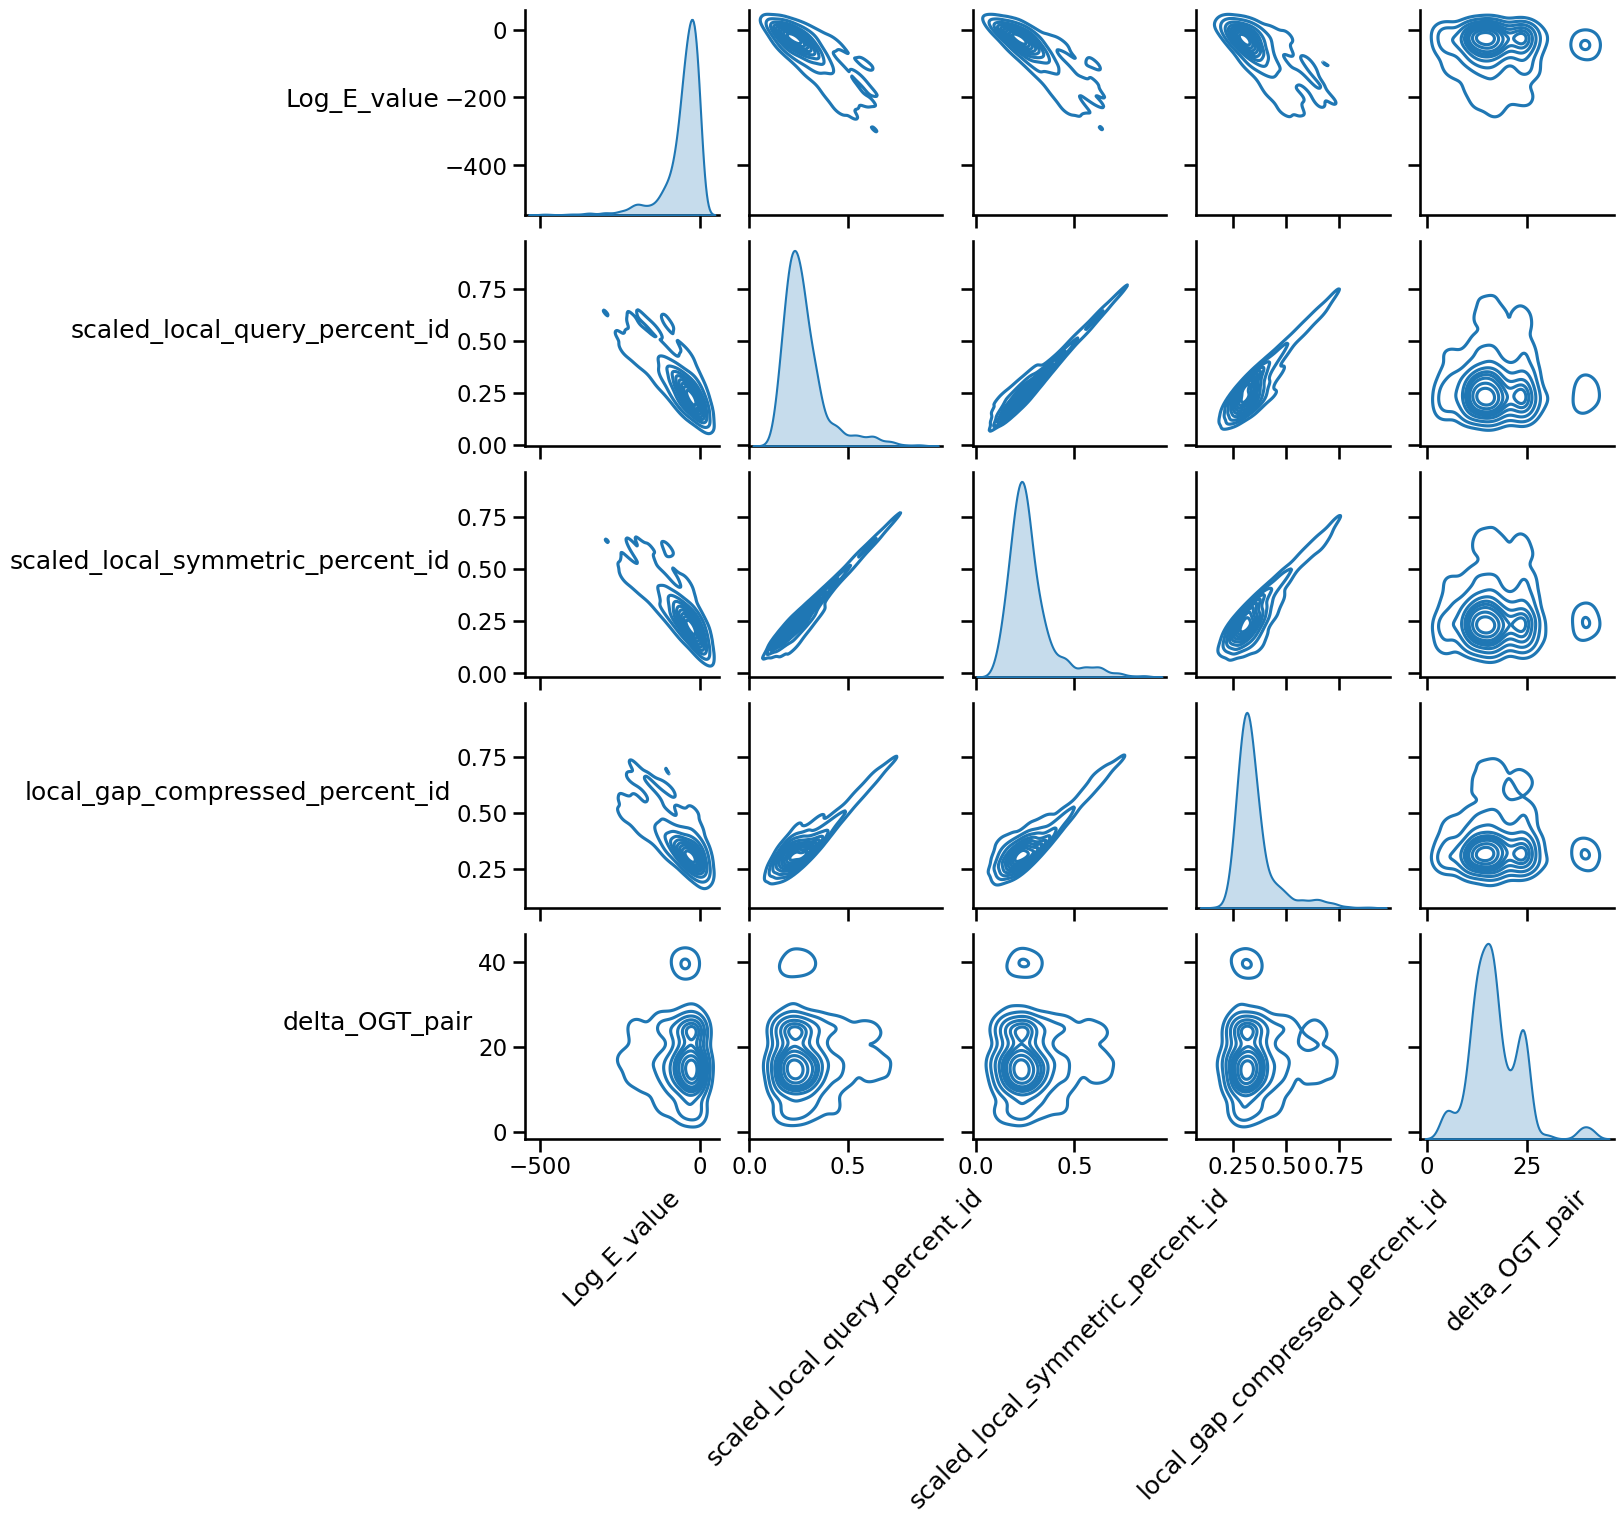

In [229]:
g2 = sns.pairplot(df_AllProPair.sample(1500), vars = ['Log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id', 'delta_OGT_pair'], kind="kde")
for ax in g2.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

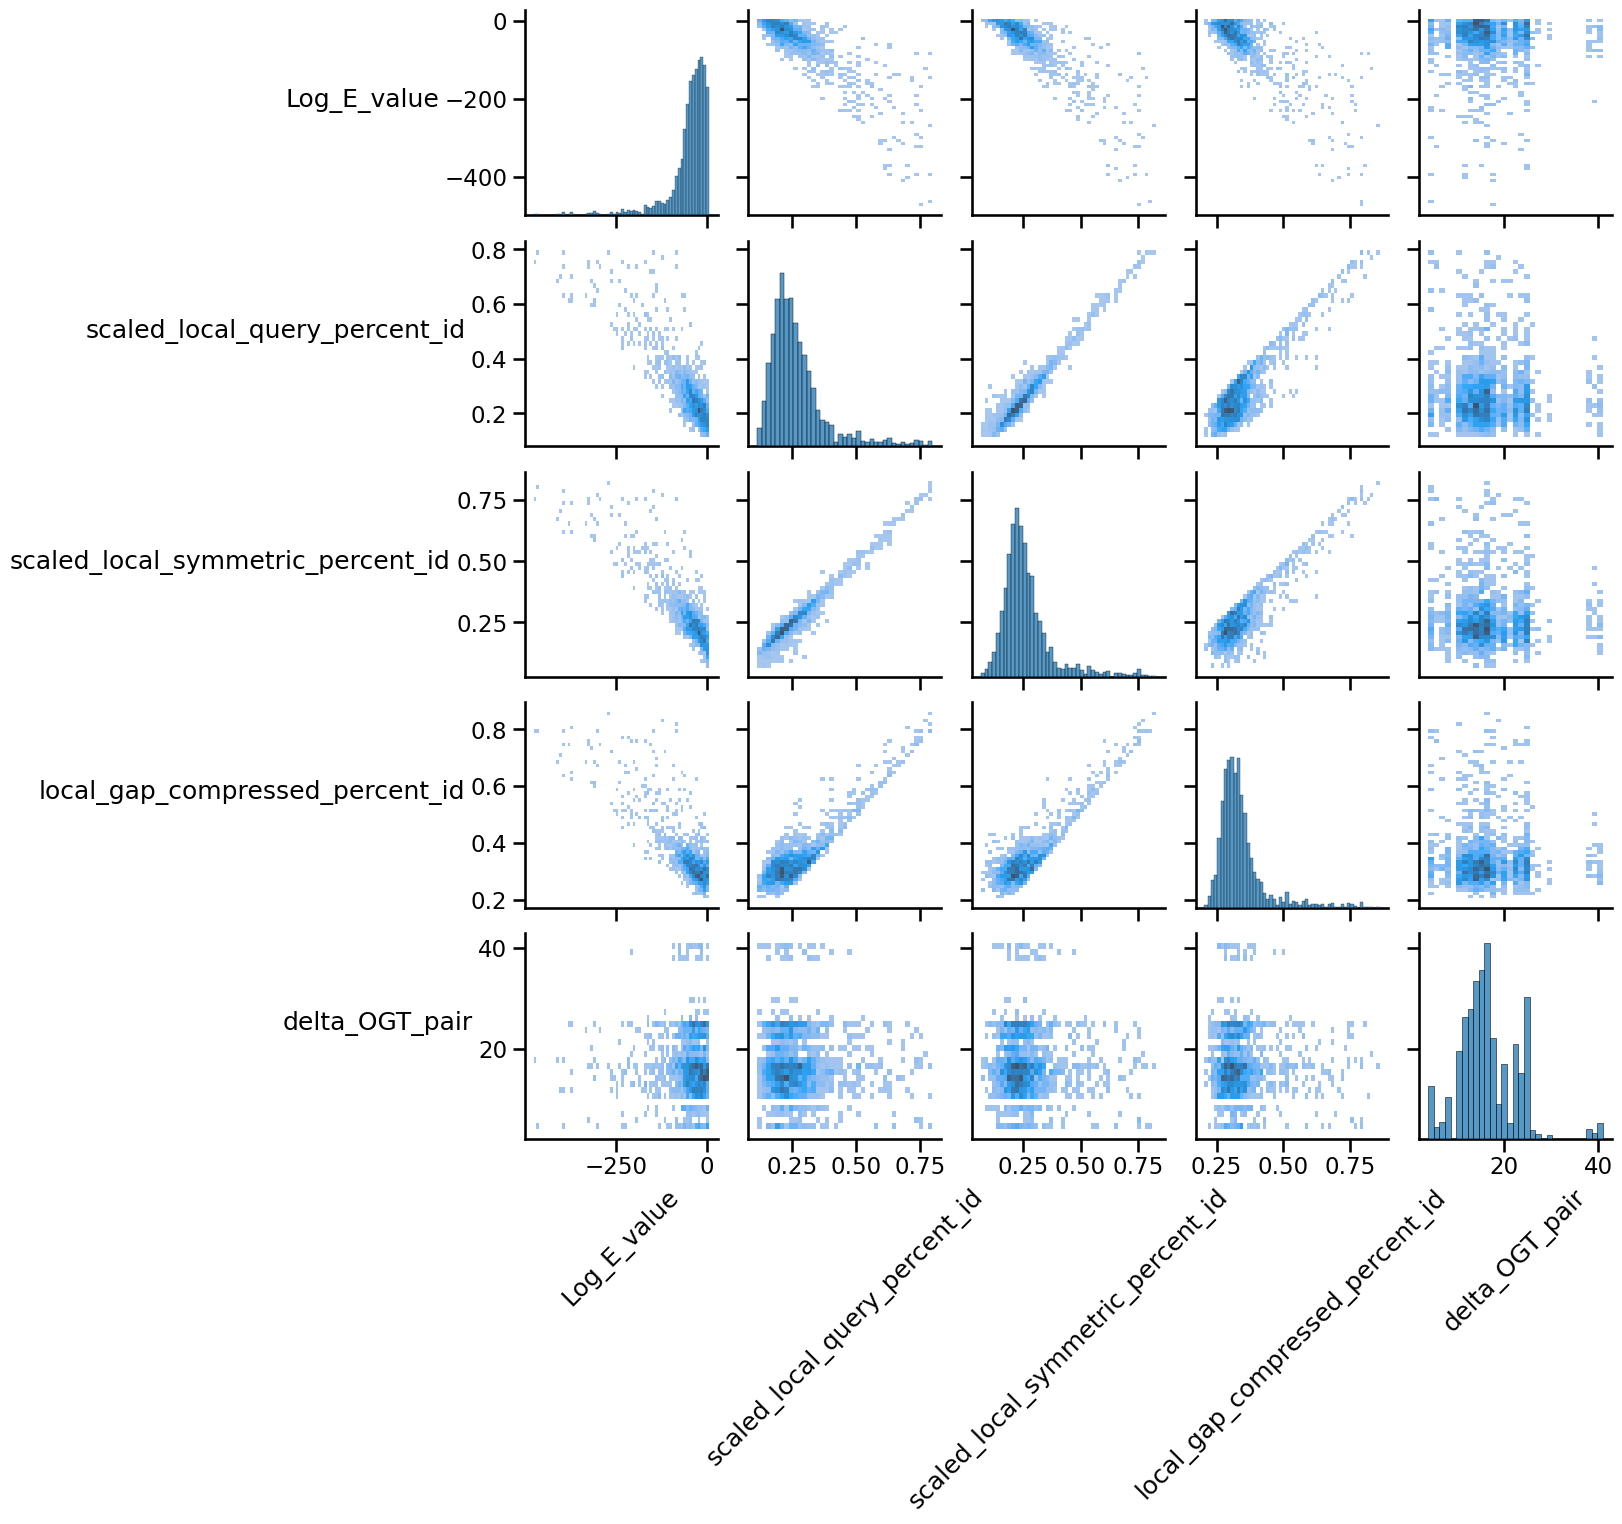

In [230]:
g2 = sns.pairplot(df_AllProPair.sample(1500), vars = ['Log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id', 'delta_OGT_pair'], kind="hist")
for ax in g2.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

<AxesSubplot:>

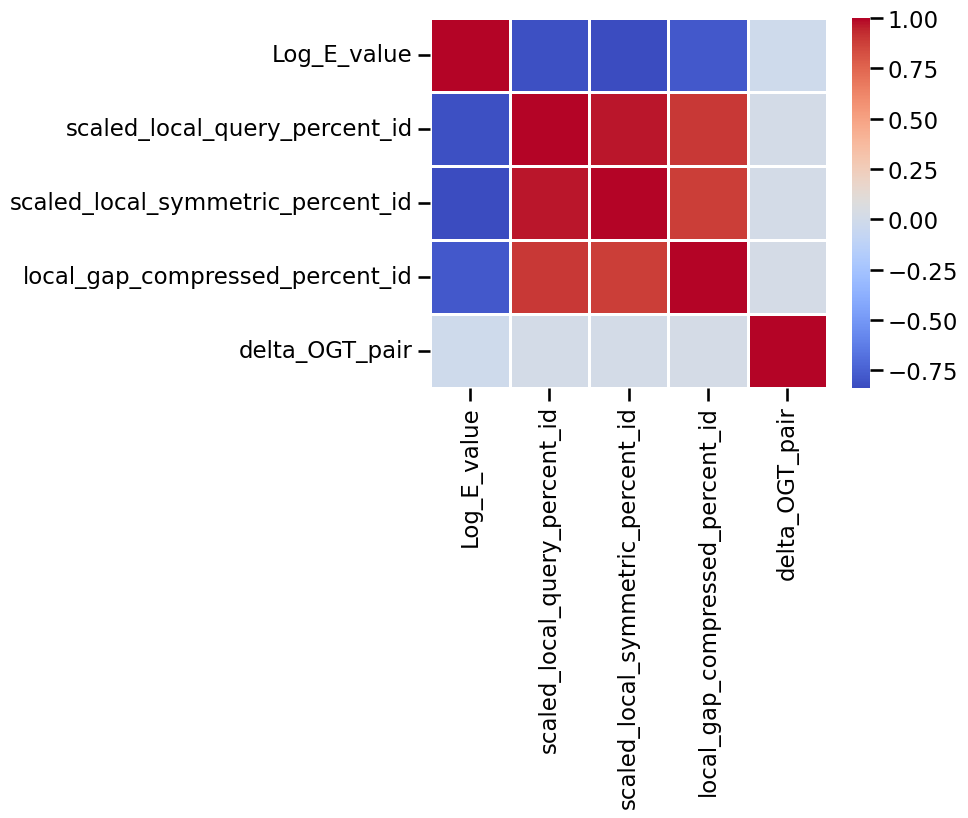

In [155]:
cormat=df_AllProPair[['Log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','delta_OGT_pair']].corr()
sns.heatmap(cormat, linewidth=0.75, fmt=".1f", cmap='coolwarm')

## Generating number of hits vs 16S quality

In [157]:
df_16s = pd.read_csv('../data/taxa_pairs/pairwise_16s_blast.csv', index_col=None)

In [158]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage
count,750633.000000,750633.000000,7.506330e+05,750633.000000,750633.000000,750633.000000,750633.000000
mean,8457.502636,8082.160624,7.732823e-12,0.667429,0.605776,0.822348,0.798307
std,4862.021723,4646.578599,1.765127e-09,0.211535,0.244945,0.054200,0.228732
min,24.000000,5.000000,0.000000e+00,0.013170,0.021458,0.704718,0.022761
25%,3997.000000,4043.000000,0.000000e+00,0.643177,0.427087,0.790074,0.643901
50%,8529.000000,8043.000000,0.000000e+00,0.757962,0.688264,0.812166,0.852390
75%,12717.000000,12069.000000,1.170250e-104,0.801040,0.795761,0.834335,0.995348
max,16650.000000,16663.000000,7.548360e-07,1.000000,0.996439,1.000000,0.999450


In [159]:
meso_OGT = df_ogt.loc[df_16s['meso_index']]['ogt']

In [160]:
thermo_OGT = df_ogt.loc[df_16s['thermo_index']]['ogt']

In [161]:
assert len(meso_OGT) == len(thermo_OGT)

In [162]:
delta_OGT = thermo_OGT.values - meso_OGT.values

In [163]:
df_16s['delta_OGT'] = delta_OGT

In [164]:
log_E_value= np.log(df_16s["local_E_value"])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [165]:
df_16s['log_E_value'] = log_E_value

In [167]:
df_16s.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
count,750633.000000,750633.000000,7.506330e+05,750633.000000,750633.000000,750633.000000,750633.000000,750633.000000,7.506330e+05
mean,8457.502636,8082.160624,7.732823e-12,0.667429,0.605776,0.822348,0.798307,25.851470,-inf
std,4862.021723,4646.578599,1.765127e-09,0.211535,0.244945,0.054200,0.228732,11.882097,NaN
min,24.000000,5.000000,0.000000e+00,0.013170,0.021458,0.704718,0.022761,1.000000,-inf
25%,3997.000000,4043.000000,0.000000e+00,0.643177,0.427087,0.790074,0.643901,17.000000,NaN
50%,8529.000000,8043.000000,0.000000e+00,0.757962,0.688264,0.812166,0.852390,24.500000,NaN
75%,12717.000000,12069.000000,1.170250e-104,0.801040,0.795761,0.834335,0.995348,32.500000,-2.393116e+02
max,16650.000000,16663.000000,7.548360e-07,1.000000,0.996439,1.000000,0.999450,98.000000,-1.409677e+01


#### Reading the hits dataframe

In [168]:
df_hits = pd.read_csv('../data/taxa_pairs/protein_alignment/completion_state.metadat', index_col=0)

In [169]:
df_hits.describe()

,pw_space,hits,execution_time,emissions
count,1.411200e+04,14112.000000,13626.000000,2.220000e+03
mean,1.085019e+07,12836.504960,0.940560,2.537075e-04
std,5.955803e+06,9054.429118,0.373517,9.829943e-05
min,1.335740e+06,0.000000,0.373392,4.903634e-07
25%,6.669135e+06,6518.500000,0.645793,1.768345e-04
50%,9.018802e+06,10356.500000,0.886013,2.745913e-04
75%,1.352096e+07,17096.250000,1.108819,3.320908e-04
max,4.996694e+07,89124.000000,3.277508,6.831047e-04


In [170]:
df_hits

,pair,pw_space,hits,execution_time,emissions
0,88-12000,2859344,3792,0.404400,0.000113
1,1844-1896,7081240,6633,0.533380,0.000158
2,49-6698,5544090,6534,0.660562,0.000184
3,11324-3104,5273579,4918,0.655736,0.000182
4,3841-1514,7549599,6719,0.629755,0.000186
...,...,...,...,...,...
14107,12872-2738,20495936,27972,1.047133,NaN
14108,10952-3236,19243680,38700,1.220994,NaN
14109,8919-11428,16556661,39458,1.211858,NaN
14110,10686-6364,9295668,10260,1.105279,NaN


In [171]:
df_hits['pair']

0          88-12000
1         1844-1896
2           49-6698
3        11324-3104
4         3841-1514
            ...    
14107    12872-2738
14108    10952-3236
14109    8919-11428
14110    10686-6364
14111    10952-4046
Name: pair, Length: 14112, dtype: object

In [84]:
# Bad work around, but time crunch
# df_hits['pair'] = df_hits['pair'].str.replace('-', '.').astype(float)

In [85]:
# df_hits['pair'].apply(int)

0           88
1         1844
2           49
3        11324
4         3841
         ...  
14107    12872
14108    10952
14109     8919
14110    10686
14111    10952
Name: pair, Length: 14112, dtype: int64

In [57]:
# df_16s.loc[df_hits['pair'].apply(int)]['log_E_value']

In [172]:
df_hits.head()

,pair,pw_space,hits,execution_time,emissions
0,88-12000,2859344,3792,0.404400,0.000113
1,1844-1896,7081240,6633,0.533380,0.000158
2,49-6698,5544090,6534,0.660562,0.000184
3,11324-3104,5273579,4918,0.655736,0.000182
4,3841-1514,7549599,6719,0.629755,0.000186


In [173]:
df_16s.head()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
0,24,1501,0.0,0.800129,0.801158,0.803744,0.997426,32.5,-inf
1,24,10270,0.0,0.800771,0.802318,0.807518,0.996136,35.0,-inf
2,24,10294,0.0,0.799486,0.800772,0.803618,0.996138,31.5,-inf
3,24,14090,0.0,0.804627,0.802307,0.804627,0.996155,28.0,-inf
4,24,12269,0.0,0.797558,0.799099,0.804799,0.996136,35.0,-inf


In [174]:
def my_func(x):
    return str(int(x['thermo_index'])) + '-' + str(int(x['meso_index']))

In [175]:
df_16s['pair_index'] = df_16s.apply(my_func, axis=1)

In [176]:
df_16s

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value,pair_index
0,24,1501,0.000000e+00,0.800129,0.801158,0.803744,0.997426,32.5,-inf,24-1501
1,24,10270,0.000000e+00,0.800771,0.802318,0.807518,0.996136,35.0,-inf,24-10270
2,24,10294,0.000000e+00,0.799486,0.800772,0.803618,0.996138,31.5,-inf,24-10294
3,24,14090,0.000000e+00,0.804627,0.802307,0.804627,0.996155,28.0,-inf,24-14090
4,24,12269,0.000000e+00,0.797558,0.799099,0.804799,0.996136,35.0,-inf,24-12269
...,...,...,...,...,...,...,...,...,...,...
750628,16650,14843,1.008060e-17,0.152561,0.113787,0.810651,0.151849,11.0,-39.135919,16650-14843
750629,16650,5961,1.008060e-17,0.150334,0.112313,0.798817,0.151995,16.0,-39.135919,16650-5961
750630,16650,16094,3.662080e-17,0.134744,0.100749,0.812081,0.134616,13.0,-37.845915,16650-16094
750631,16650,11097,1.330360e-16,0.150334,0.111987,0.794118,0.151740,11.0,-36.555912,16650-11097


In [177]:
df_16s = df_16s.set_index('pair_index')

In [178]:
df_16s

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
pair_index,,,,,,,,,
24-1501,24,1501,0.000000e+00,0.800129,0.801158,0.803744,0.997426,32.5,-inf
24-10270,24,10270,0.000000e+00,0.800771,0.802318,0.807518,0.996136,35.0,-inf
24-10294,24,10294,0.000000e+00,0.799486,0.800772,0.803618,0.996138,31.5,-inf
24-14090,24,14090,0.000000e+00,0.804627,0.802307,0.804627,0.996155,28.0,-inf
24-12269,24,12269,0.000000e+00,0.797558,0.799099,0.804799,0.996136,35.0,-inf
...,...,...,...,...,...,...,...,...,...
16650-14843,16650,14843,1.008060e-17,0.152561,0.113787,0.810651,0.151849,11.0,-39.135919
16650-5961,16650,5961,1.008060e-17,0.150334,0.112313,0.798817,0.151995,16.0,-39.135919
16650-16094,16650,16094,3.662080e-17,0.134744,0.100749,0.812081,0.134616,13.0,-37.845915


In [179]:
df_hits

,pair,pw_space,hits,execution_time,emissions
0,88-12000,2859344,3792,0.404400,0.000113
1,1844-1896,7081240,6633,0.533380,0.000158
2,49-6698,5544090,6534,0.660562,0.000184
3,11324-3104,5273579,4918,0.655736,0.000182
4,3841-1514,7549599,6719,0.629755,0.000186
...,...,...,...,...,...
14107,12872-2738,20495936,27972,1.047133,NaN
14108,10952-3236,19243680,38700,1.220994,NaN
14109,8919-11428,16556661,39458,1.211858,NaN
14110,10686-6364,9295668,10260,1.105279,NaN


In [180]:
df_hits = df_hits.set_index('pair')

In [181]:
df_hits

,pw_space,hits,execution_time,emissions
pair,,,,
88-12000,2859344,3792,0.404400,0.000113
1844-1896,7081240,6633,0.533380,0.000158
49-6698,5544090,6534,0.660562,0.000184
11324-3104,5273579,4918,0.655736,0.000182
3841-1514,7549599,6719,0.629755,0.000186
...,...,...,...,...
12872-2738,20495936,27972,1.047133,NaN
10952-3236,19243680,38700,1.220994,NaN
8919-11428,16556661,39458,1.211858,NaN


In [182]:
df_16s.loc[df_hits.index]

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
pair,,,,,,,,,
88-12000,88,12000,0.000000e+00,0.934095,0.909925,0.939148,0.969617,34.0,-inf
1844-1896,1844,1896,3.966130e-25,0.927536,0.882759,0.955224,0.912471,35.0,-56.186837
49-6698,49,6698,5.476430e-39,0.977528,0.945652,0.977528,0.957540,16.0,-88.100365
11324-3104,11324,3104,0.000000e+00,0.886472,0.882273,0.885268,0.999323,32.0,-inf
3841-1514,3841,1514,0.000000e+00,0.888464,0.893876,0.895311,0.996152,31.0,-inf
...,...,...,...,...,...,...,...,...,...
12872-2738,12872,2738,0.000000e+00,0.969895,0.970848,0.969895,0.999345,14.0,-inf
10952-3236,10952,3236,0.000000e+00,0.920646,0.921265,0.919409,0.999327,11.0,-inf
8919-11428,8919,11428,0.000000e+00,0.983040,0.984324,0.986257,0.999347,6.0,-inf


In [183]:
df_16s.loc['16361-16204']

thermo_index                         1.636100e+04
meso_index                           1.620400e+04
local_E_value                        0.000000e+00
scaled_local_query_percent_id        9.000680e-01
scaled_local_symmetric_percent_id    8.997621e-01
local_gap_compressed_percent_id      8.933873e-01
local_average_coverage               9.993204e-01
delta_OGT                            5.000000e+00
log_E_value                                  -inf
Name: 16361-16204, dtype: float64

In [184]:
df_hits['log_E_value'] = df_16s.loc[df_hits.index]['log_E_value']

In [185]:
df_hits.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,pw_space,hits,execution_time,emissions,log_E_value
count,1.411200e+04,14112.000000,13626.000000,2.220000e+03,1.411200e+04
mean,1.085019e+07,12836.504960,0.940560,2.537075e-04,-inf
std,5.955803e+06,9054.429118,0.373517,9.829943e-05,NaN
min,1.335740e+06,0.000000,0.373392,4.903634e-07,-inf
25%,6.669135e+06,6518.500000,0.645793,1.768345e-04,NaN
50%,9.018802e+06,10356.500000,0.886013,2.745913e-04,NaN
75%,1.352096e+07,17096.250000,1.108819,3.320908e-04,NaN
max,4.996694e+07,89124.000000,3.277508,6.831047e-04,-4.343766e+01


In [186]:
df_hits['#hit%'] = df_hits['hits']/df_hits['pw_space']

In [187]:
df_hits['local_gap_compressed_percent_id'] = df_16s.loc[df_hits.index]['local_gap_compressed_percent_id']

In [188]:
df_hits['scaled_local_query_percent_id'] = df_16s.loc[df_hits.index]['scaled_local_query_percent_id'] 

In [189]:
df_hits['scaled_local_symmetric_percent_id'] = df_16s.loc[df_hits.index]['scaled_local_symmetric_percent_id']

In [190]:
df_hits.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,pw_space,hits,execution_time,emissions,log_E_value,#hit%,local_gap_compressed_percent_id,scaled_local_query_percent_id,scaled_local_symmetric_percent_id
count,1.411200e+04,14112.000000,13626.000000,2.220000e+03,1.411200e+04,14112.000000,14112.000000,14112.000000,14112.000000
mean,1.085019e+07,12836.504960,0.940560,2.537075e-04,-inf,0.001137,0.905602,0.902327,0.903584
std,5.955803e+06,9054.429118,0.373517,9.829943e-05,NaN,0.000356,0.018601,0.018356,0.017438
min,1.335740e+06,0.000000,0.373392,4.903634e-07,-inf,0.000000,0.873467,0.806452,0.880026
25%,6.669135e+06,6518.500000,0.645793,1.768345e-04,NaN,0.000936,0.891852,0.889606,0.890080
50%,9.018802e+06,10356.500000,0.886013,2.745913e-04,NaN,0.001134,0.902722,0.900196,0.900946
75%,1.352096e+07,17096.250000,1.108819,3.320908e-04,NaN,0.001342,0.914384,0.911649,0.912698
max,4.996694e+07,89124.000000,3.277508,6.831047e-04,-4.343766e+01,0.003856,1.000000,0.998709,0.996439


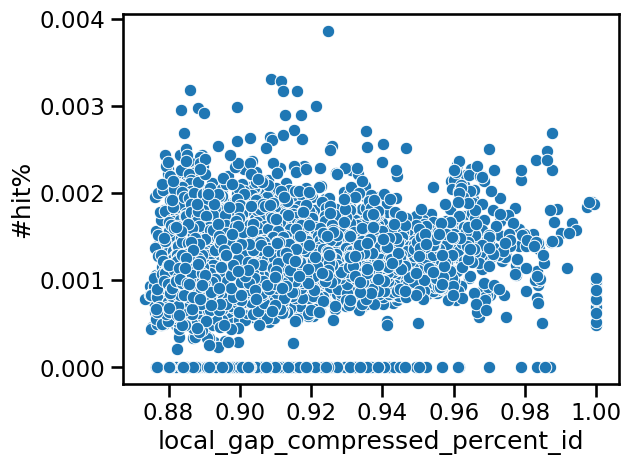

In [191]:
g2 = sns.scatterplot(x='local_gap_compressed_percent_id', y='#hit%', data=df_hits)

In [111]:
# df_hits.sample(100).plot.hexbin(x='local_gap_compressed_percent_id', y='#hit%', gridsize=2)

<AxesSubplot:xlabel='log_E_value', ylabel='#hit%'>

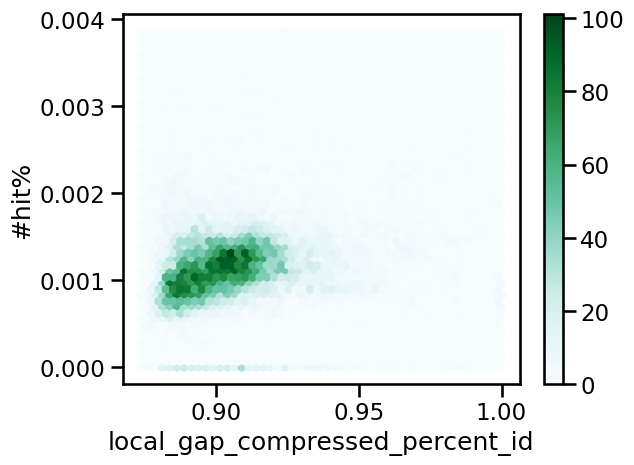

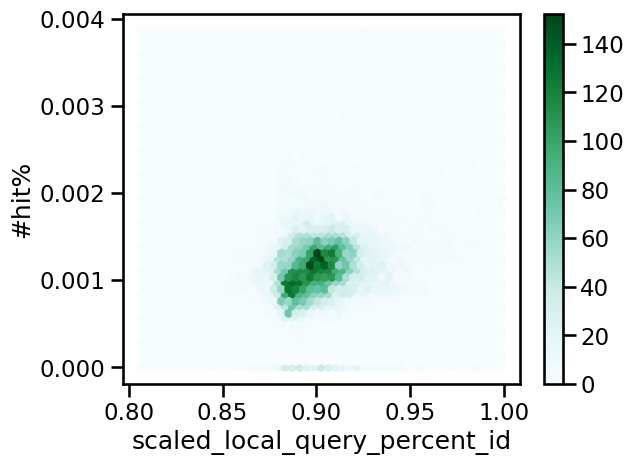

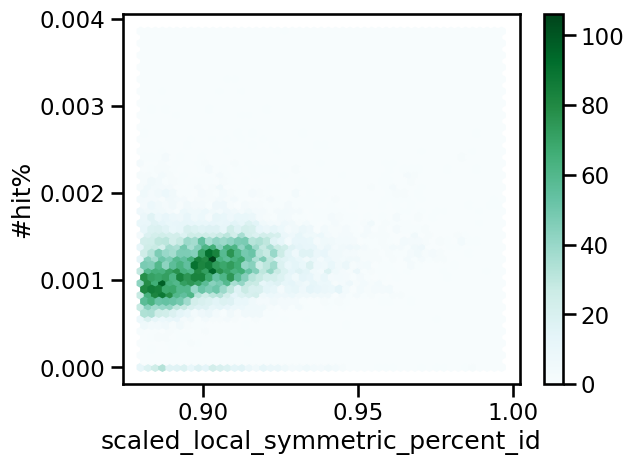

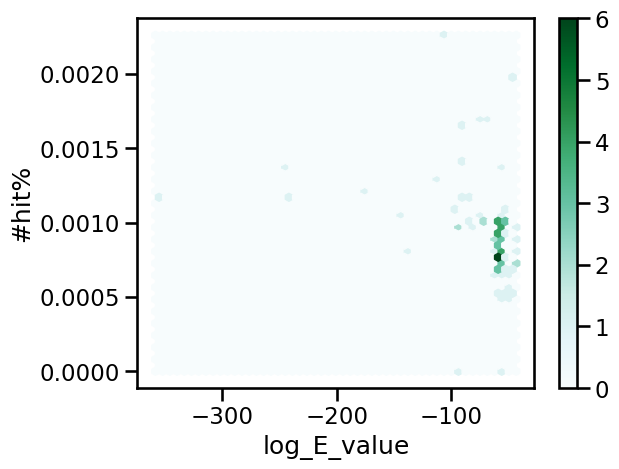

In [202]:
df_hits.plot.hexbin(x='local_gap_compressed_percent_id', y='#hit%', gridsize=50)
df_hits.plot.hexbin(x='scaled_local_query_percent_id',y='#hit%', gridsize=50)
df_hits.plot.hexbin(x='scaled_local_symmetric_percent_id',y='#hit%', gridsize=50)
df_hits.plot.hexbin(x='log_E_value',y='#hit%', gridsize=50)

## Generating Prot. align score vs taxa align

In [250]:
df_AllProPair.describe()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,Log_E_value,delta_OGT_pair
count,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06
mean,9.669166e+03,8.209164e+03,5.516712e-01,2.715572e-01,2.661367e-01,3.446589e-01,-5.171925e+01,1.678851e+01
std,4.798702e+03,4.604288e+03,4.644963e+00,1.091369e-01,1.108896e-01,9.172283e-02,5.920866e+01,6.183858e+00
min,3.710000e+01,2.501000e+02,1.730000e-279,7.734807e-02,3.821656e-02,1.522843e-01,-6.418731e+02,4.000000e+00
25%,5.730297e+03,4.359256e+03,1.230000e-27,2.023810e-01,2.000000e-01,2.920792e-01,-6.196278e+01,1.300000e+01
50%,9.827350e+03,8.160348e+03,1.540000e-16,2.470588e-01,2.425373e-01,3.227513e-01,-3.640958e+01,1.600000e+01
75%,1.496318e+04,1.135849e+04,4.570000e-08,3.045455e-01,2.983425e-01,3.632075e-01,-1.690117e+01,2.000000e+01
max,1.646300e+04,1.662100e+04,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,4.605170e+00,4.100000e+01


In [251]:
df_16s.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_delta_OGT,log_E_value
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8426.784000,8067.117333,8.095357e-13,0.664807,0.599838,0.824766,0.790546,25.661333,3.125770,-inf
std,4851.685224,4638.211073,3.130120e-11,0.213921,0.248252,0.057631,0.231558,11.662181,0.526575,NaN
min,24.000000,5.000000,0.000000e+00,0.030109,0.032520,0.716707,0.032520,1.000000,0.000000,-inf
25%,4040.000000,4040.000000,0.000000e+00,0.629290,0.416996,0.789659,0.628513,17.000000,2.833213,NaN
50%,8529.000000,8172.000000,0.000000e+00,0.755485,0.683037,0.812480,0.849076,24.500000,3.198673,NaN
75%,12555.000000,12040.500000,1.748965e-90,0.800615,0.795081,0.836890,0.995344,33.000000,3.496508,-207.995694
max,16626.000000,16345.000000,1.212290e-09,0.983871,0.959764,1.000000,0.999362,68.000000,4.219508,-20.530755


In [252]:
df_AllProPair["corresponding_scaled_local_query_percent_id"] = df_AllProPair.loc[df_16s["thermo_index"]]["scaled_local_query_percent_id"]

8316     0.247191
268      0.203488
3997     0.245211
2244     0.202479
10374    0.142857
           ...   
2390     0.168874
2489     0.277344
1906     0.198113
1906     0.198113
8197     0.442804
Name: scaled_local_query_percent_id, Length: 1500, dtype: float64

In [254]:
#df_16s.loc[df_AllProPair["thermo_protein_id"]]["scaled_local_query_percent_id"]

KeyError: "None of [Float64Index([   14963.2,    14963.2,    14963.3,    14963.5,    14963.8,\n                14963.14,   14963.14,   14963.17,   14963.17,   14963.17,\n              ...\n              15966.4871, 15966.4871, 15966.4871, 15966.4871, 15966.4873,\n              15966.4873, 15966.4873, 15966.4874, 15966.4874, 15966.4876],\n             dtype='float64', length=1282840)] are in the [index]"

## gnerating prot. len. dist in date
#### vs taxonomy

## Generating prot. len vs alignment

In [366]:
# This is my path
path = "../data/taxa/proteins/"

# to store files in a list
list = []

# dirs=directories
for (root, dirs, file) in os.walk(path):
	for f in file:
		if 'taxa_index' in f:
			list.append(f)

In [367]:
list

['taxa_index_4417.csv',
 'taxa_index_3378.csv',
 'taxa_index_14913.csv',
 'taxa_index_2066.csv',
 'taxa_index_5709.csv',
 'taxa_index_9133.csv',
 'taxa_index_6200.csv',
 'taxa_index_7678.csv',
 'taxa_index_1209.csv',
 'taxa_index_9655.csv',
 'taxa_index_6566.csv',
 'taxa_index_871.csv',
 'taxa_index_2700.csv',
 'taxa_index_4371.csv',
 'taxa_index_865.csv',
 'taxa_index_2714.csv',
 'taxa_index_4365.csv',
 'taxa_index_9899.csv',
 'taxa_index_9641.csv',
 'taxa_index_6572.csv',
 'taxa_index_9127.csv',
 'taxa_index_6214.csv',
 'taxa_index_8239.csv',
 'taxa_index_4403.csv',
 'taxa_index_14907.csv',
 'taxa_index_2072.csv',
 'taxa_index_1553.csv',
 'taxa_index_10591.csv',
 'taxa_index_7122.csv',
 'taxa_index_11857.csv',
 'taxa_index_8211.csv',
 'taxa_index_3344.csv',
 'taxa_index_13098.csv',
 'taxa_index_12386.csv',
 'taxa_index_5735.csv',
 'taxa_index_13926.csv',
 'taxa_index_5053.csv',
 'taxa_index_3422.csv',
 'taxa_index_695.csv',
 'taxa_index_14091.csv',
 'taxa_index_7644.csv',
 'taxa_inde

In [370]:
Listofdf = []
for i in list[0:100]:
    df_Prot = pd.read_csv('../data/taxa/proteins/'+i, sep=';', index_col=0, dtype={"seq_id":str})
    Listofdf.append(df_Prot)

In [371]:
df_Prot = pd.concat(Listofdf)

In [372]:
df_Prot.head()

,protein_seq,protein_desc,protein_len
seq_id,,,
4417.0,MSKYDEALARMQLRSNEAFERITGQTVEQYQQEQRQNRMPTTAQLA...,hypothetical protein,4602
4417.1,MTEEETLGILSENPEASPMKINPKHLEKFFKDNHTPNTKISISIAN...,hypothetical protein,53
4417.2,MTQHLSHLSTTPNTQKPITLYISGLTHDGRGIATYDDTHGDKSGKK...,23S rRNA (uracil(1939)-C(5))-methyltransferase...,476
4417.3,MSNNIQHLRNIAIIAHVDHGKTTLVDKLLQQSGALGERAGEIERVM...,translational GTPase TypA,615
4417.4,MKLNKIALALIATATTAATAGVTVTPLIGYQHQNEAHKKQREIFHT...,OmpA family protein,423


In [373]:
df_Prot.columns

Index(['protein_seq', 'protein_desc', 'protein_len'], dtype='object')

In [374]:
df_Prot["protein_len"]

seq_id
4417.0       4602
4417.1         53
4417.2        476
4417.3        615
4417.4        423
             ... 
7687.2997     185
7687.2998     123
7687.2999     272
7687.3000     194
7687.3001     197
Name: protein_len, Length: 388116, dtype: int64

In [375]:
df_Prot["protein_seq"]

seq_id
4417.0       MSKYDEALARMQLRSNEAFERITGQTVEQYQQEQRQNRMPTTAQLA...
4417.1       MTEEETLGILSENPEASPMKINPKHLEKFFKDNHTPNTKISISIAN...
4417.2       MTQHLSHLSTTPNTQKPITLYISGLTHDGRGIATYDDTHGDKSGKK...
4417.3       MSNNIQHLRNIAIIAHVDHGKTTLVDKLLQQSGALGERAGEIERVM...
4417.4       MKLNKIALALIATATTAATAGVTVTPLIGYQHQNEAHKKQREIFHT...
                                   ...                        
7687.2997    MSTGSSSSASPSVSLRVFVEPQQGGTYDDQLAVARAAEDLGYEAFF...
7687.2998    MALREKTKVKTEEMMTTTPSTPGPFTGRRGRLAATAGVVVVVAIFL...
7687.2999    MSGRLEGKVAFITGVARGQGRTHAVRLAAEGADIIGLDIAGPIIDA...
7687.3000    MTVTRKFDADEQHRRSEIARVARELARTRGYDGVTVREIASGAGVS...
7687.3001    MSTRTSIAAALLPLLALTACSSGDDSAEAEASKCAPVEGELLAADP...
Name: protein_seq, Length: 388116, dtype: object

In [376]:
type(df_Prot.reset_index()["seq_id"].iloc[0])

str

In [377]:
df_Prot.head()

,protein_seq,protein_desc,protein_len
seq_id,,,
4417.0,MSKYDEALARMQLRSNEAFERITGQTVEQYQQEQRQNRMPTTAQLA...,hypothetical protein,4602
4417.1,MTEEETLGILSENPEASPMKINPKHLEKFFKDNHTPNTKISISIAN...,hypothetical protein,53
4417.2,MTQHLSHLSTTPNTQKPITLYISGLTHDGRGIATYDDTHGDKSGKK...,23S rRNA (uracil(1939)-C(5))-methyltransferase...,476
4417.3,MSNNIQHLRNIAIIAHVDHGKTTLVDKLLQQSGALGERAGEIERVM...,translational GTPase TypA,615
4417.4,MKLNKIALALIATATTAATAGVTVTPLIGYQHQNEAHKKQREIFHT...,OmpA family protein,423


In [380]:
df_Prot.index.duplicated().any() #checking if there are any duplicates

False

<AxesSubplot:xlabel='protein_len', ylabel='Count'>

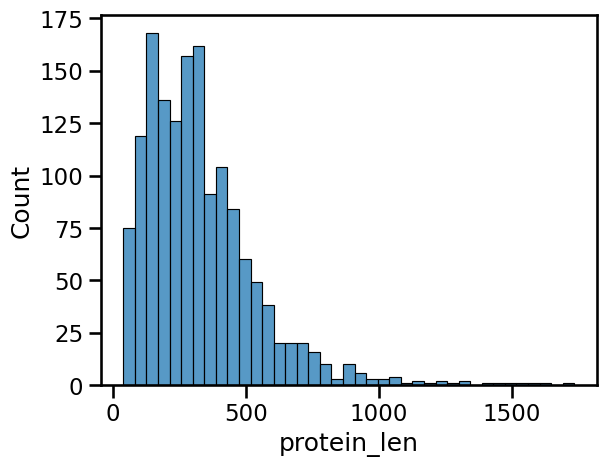

In [383]:
sns.histplot(data=df_Prot.sample(1500), x="protein_len")

In [ ]:
df_AllProPair.loc[]